# Today, we will apply unsupervised learning on two datasets
1. The first dataset is the [HCC radiotherapy data](https://www.dropbox.com/s/3ja202d3b3nx9mh/HCC_RT_cleaned_012721.xlsx?dl=0) that we have been using as example. If you haven't, download the excel file and place it in the same folder as this notebook.

2. The second dataset is the [Wisconsin's breast cancer data](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data) which describe the morphology of nuclei image from [fine needle aspiration biopsy](https://en.wikipedia.org/wiki/Fine-needle_aspiration). This dataset is provided through [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html).

## First import the library

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

## Load HCC radiotherapy example data with pandas

In [2]:
hcc_data = pd.read_excel('HCC_RT_cleaned_012721.xlsx', header = 0, index_col = 0)
hcc_data.head(20)

,age,sex,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,...,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,rt_tech,outcome
study_id,,,,,,,,,,,,,,,,,,,,,
2,53,0,3.7,0,0,0,0,30.0,10,3.0,...,3.20,0.74,1.28,1.73,0,7,-1.992530,11.438829,2,1
3,54,1,2.0,0,1,0,0,30.0,10,3.0,...,2.80,2.30,1.30,80.95,0,8,-1.327482,4.743520,2,0
4,53,1,7.4,0,0,0,0,45.0,25,1.8,...,4.20,0.43,1.10,0.65,0,5,-2.998133,23.603924,1,0
5,41,1,5.8,1,1,0,0,30.0,10,3.0,...,2.90,0.42,0.98,940.30,1,6,-1.899878,17.789652,1,0
6,54,1,14.4,0,1,0,0,30.0,10,3.0,...,3.20,2.97,1.57,59894.00,1,8,-1.594203,21.102035,1,1
10,48,1,10.1,0,0,0,1,30.0,10,3.0,...,3.51,0.52,NaN,35.40,0,6,-2.357160,13.813466,1,0
12,54,1,6.0,0,1,0,0,20.0,5,4.0,...,2.80,1.94,1.16,240.00,0,6,-1.376273,11.706867,1,1
13,74,1,4.1,0,1,0,0,50.0,10,5.0,...,3.70,0.37,1.13,2396.00,0,6,-2.616209,23.644761,2,0
14,60,1,11.1,0,0,0,0,30.0,10,3.0,...,3.80,1.99,1.25,59.31,0,6,-2.218980,8.755284,2,1


## Split input and output

In [3]:
hcc_input = hcc_data.iloc[:, :-1]
hcc_input.head()

,age,sex,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,...,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,rt_tech
study_id,,,,,,,,,,,,,,,,,,,,,
2,53,0,3.7,0,0,0,0,30.0,10,3.0,...,69,3.2,0.74,1.28,1.73,0,7,-1.992530,11.438829,2
3,54,1,2.0,0,1,0,0,30.0,10,3.0,...,283,2.8,2.30,1.30,80.95,0,8,-1.327482,4.743520,2
4,53,1,7.4,0,0,0,0,45.0,25,1.8,...,160,4.2,0.43,1.10,0.65,0,5,-2.998133,23.603924,1
5,41,1,5.8,1,1,0,0,30.0,10,3.0,...,123,2.9,0.42,0.98,940.30,1,6,-1.899878,17.789652,1
6,54,1,14.4,0,1,0,0,30.0,10,3.0,...,140,3.2,2.97,1.57,59894.00,1,8,-1.594203,21.102035,1


## What if we call PCA straight away?
Recall that the only key parameter for PCA is **n_components**

**PCA.fit(data)** is called to fit the **PCA** to **data**

In [4]:
hcc_pca = PCA(n_components = hcc_input.shape[1]).fit(hcc_input)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

## We have missing data! For now, we will just impute with mean values
**DataFrame.fillna(value)** will fill missing data with user-provided **value**

In [5]:
hcc_input_imputed = hcc_input.fillna(hcc_input.mean(axis = 0))
hcc_input_imputed.head(20)

,age,sex,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,...,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,rt_tech
study_id,,,,,,,,,,,,,,,,,,,,,
2,53,0,3.7,0,0,0,0,30.0,10,3.0,...,69,3.20,0.74,1.280000,1.730000,0,7,-1.992530,11.438829,2
3,54,1,2.0,0,1,0,0,30.0,10,3.0,...,283,2.80,2.30,1.300000,80.950000,0,8,-1.327482,4.743520,2
4,53,1,7.4,0,0,0,0,45.0,25,1.8,...,160,4.20,0.43,1.100000,0.650000,0,5,-2.998133,23.603924,1
5,41,1,5.8,1,1,0,0,30.0,10,3.0,...,123,2.90,0.42,0.980000,940.300000,1,6,-1.899878,17.789652,1
6,54,1,14.4,0,1,0,0,30.0,10,3.0,...,140,3.20,2.97,1.570000,59894.000000,1,8,-1.594203,21.102035,1
10,48,1,10.1,0,0,0,1,30.0,10,3.0,...,170,3.51,0.52,1.196577,35.400000,0,6,-2.357160,13.813466,1
12,54,1,6.0,0,1,0,0,20.0,5,4.0,...,207,2.80,1.94,1.160000,240.000000,0,6,-1.376273,11.706867,1
13,74,1,4.1,0,1,0,0,50.0,10,5.0,...,125,3.70,0.37,1.130000,2396.000000,0,6,-2.616209,23.644761,2
14,60,1,11.1,0,0,0,0,30.0,10,3.0,...,109,3.80,1.99,1.250000,59.310000,0,6,-2.218980,8.755284,2


## Let's try calling PCA again

In [6]:
hcc_pca = PCA(n_components = hcc_input.shape[1]).fit(hcc_input_imputed)

## Visualize PCA results
Starting with the explained variances. We access this through **PCA.explained_variance_ratio_**

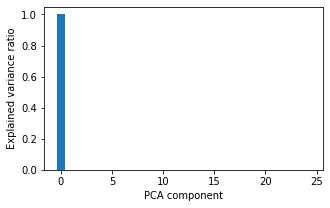

In [7]:
plt.figure(figsize = (5, 3))

plt.bar(range(len(hcc_pca.explained_variance_ratio_)), hcc_pca.explained_variance_ratio_)
plt.xlabel('PCA component')
plt.ylabel('Explained variance ratio')

plt.show()

## Do you understand what happened?
Let's look at the first PCA component. We access this through **hcc_pca.components_[0, :]**

Note that we also use **plt.xticks()** to add feature names to the ticks on x-axis 

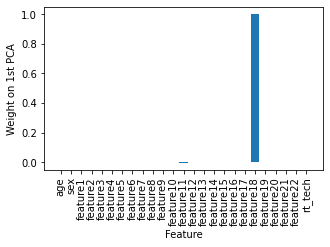

In [8]:
plt.figure(figsize = (5, 3))

plt.bar(range(hcc_pca.components_.shape[1]), hcc_pca.components_[0, :])
plt.xlabel('Feature')
plt.ylabel('Weight on 1st PCA')

plt.xticks(range(hcc_pca.components_.shape[1]), labels = hcc_input_imputed.columns.values, rotation = 90)

plt.show()

## We have to standardize data first
Variance of **afp** feature dominates all others

In [9]:
hcc_input_imputed_std = (hcc_input_imputed - hcc_input_imputed.mean(axis = 0)) / hcc_input_imputed.std(axis = 0)
hcc_input_imputed_std.head(10)

,age,sex,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,...,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,rt_tech
study_id,,,,,,,,,,,,,,,,,,,,,
2,-0.712257,-2.186163,-0.823326,-0.362132,-1.336953,-0.148093,-0.252870,-0.733512,-0.259310,-0.416553,...,-0.840248,-0.547971,-0.415823,0.406767,-0.214956,-0.544095,0.766195,0.255530,-0.764237,0.169859
3,-0.626058,0.455451,-1.180476,-0.362132,0.744746,-0.148093,-0.252870,-0.733512,-0.259310,-0.416553,...,0.986224,-1.331752,0.616530,0.504286,-0.213699,-0.544095,1.668516,1.546202,-1.617258,0.169859
4,-0.712257,0.455451,-0.045998,-0.362132,-1.336953,-0.148093,-0.252870,0.835401,2.025241,-0.977328,...,-0.063570,1.411482,-0.620970,-0.470901,-0.214974,-0.544095,-1.038447,-1.696069,0.785667,-1.237543
5,-1.746647,0.455451,-0.382140,2.749521,0.744746,-0.148093,-0.252870,-0.733512,-0.259310,-0.416553,...,-0.379362,-1.135807,-0.627588,-1.056013,-0.200054,0.377292,-0.136126,0.435341,0.044895,-1.237543
6,-0.626058,0.455451,1.424621,-0.362132,0.744746,-0.148093,-0.252870,-0.733512,-0.259310,-0.416553,...,-0.234269,-0.547971,1.059912,1.820788,0.735982,0.377292,1.668516,1.028571,0.466912,-1.237543
10,-1.143253,0.455451,0.521241,-0.362132,-1.336953,-0.148093,3.937551,-0.733512,-0.259310,-0.416553,...,0.021779,0.059459,-0.561411,0.000000,-0.214422,-0.544095,-0.136126,-0.452118,-0.461694,-1.237543
12,-0.626058,0.455451,-0.340122,-0.362132,0.744746,-0.148093,-0.252870,-1.779455,-1.020826,0.050760,...,0.337571,-1.331752,0.378294,-0.178345,-0.211173,-0.544095,-0.136126,1.451512,-0.730087,-1.237543
13,1.097924,0.455451,-0.739291,-0.362132,0.744746,-0.148093,-0.252870,1.358373,-0.259310,0.518073,...,-0.362292,0.431755,-0.660676,-0.324623,-0.176941,-0.544095,-0.136126,-0.954860,0.790870,0.169859
14,-0.108864,0.455451,0.731329,-0.362132,-1.336953,-0.148093,-0.252870,-0.733512,-0.259310,-0.416553,...,-0.498851,0.627701,0.411383,0.260489,-0.214042,-0.544095,-0.136126,-0.183947,-1.106136,0.169859


In [10]:
hcc_input_imputed_std.describe()

,age,sex,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,...,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,rt_tech
count,2.320000e+02,2.320000e+02,2.320000e+02,2.320000e+02,2.320000e+02,2.320000e+02,2.320000e+02,2.320000e+02,2.320000e+02,2.320000e+02,...,2.320000e+02,2.320000e+02,2.320000e+02,2.320000e+02,2.320000e+02,2.320000e+02,2.320000e+02,2.320000e+02,2.320000e+02,2.320000e+02
mean,-2.170199e-16,-3.062684e-17,5.043858e-16,1.153292e-16,-2.469289e-16,1.952461e-16,-1.684476e-16,-3.847497e-16,5.838242e-17,3.953674e-16,...,1.134150e-16,2.393769e-15,-3.433556e-16,8.530054e-17,8.900926e-17,-1.028870e-16,5.315432e-16,-7.645345e-16,-3.933635e-16,6.579986e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.694837e+00,-2.186163e+00,-1.432583e+00,-3.621320e-01,-1.336953e+00,-1.480928e-01,-2.528703e-01,-2.616208e+00,-1.325433e+00,-9.773285e-01,...,-1.420622e+00,-2.703369e+00,-7.136172e-01,-1.348569e+00,-2.149736e-01,-5.440953e-01,-1.038447e+00,-2.199127e+00,-2.190381e+00,-1.237543e+00
25%,-6.476081e-01,4.554507e-01,-8.023171e-01,-3.621320e-01,-1.336953e+00,-1.480928e-01,-2.528703e-01,-7.335122e-01,-2.593096e-01,-4.165530e-01,...,-5.607291e-01,-7.439165e-01,-4.571834e-01,-4.709010e-01,-2.147947e-01,-5.440953e-01,-1.038447e+00,-7.611028e-01,-7.043584e-01,-1.237543e+00
50%,6.353470e-02,4.554507e-01,-1.300337e-01,-3.621320e-01,7.447455e-01,-1.480928e-01,-2.528703e-01,-7.335122e-01,-2.593096e-01,-4.165530e-01,...,-2.428036e-01,3.986473e-02,-2.669261e-01,-8.082629e-02,-2.112548e-01,-5.440953e-01,-1.361260e-01,-1.242852e-01,6.370836e-02,1.698589e-01
75%,6.022793e-01,4.554507e-01,5.212407e-01,-3.621320e-01,7.447455e-01,-1.480928e-01,-2.528703e-01,8.354014e-01,-2.593096e-01,5.075985e-02,...,2.372853e-01,6.766870e-01,1.963092e-01,3.092484e-01,-1.403081e-01,3.772924e-01,7.661951e-01,6.695060e-01,5.919334e-01,1.698589e-01
max,2.994305e+00,4.554507e-01,3.546516e+00,2.749521e+00,7.447455e-01,6.723415e+00,3.937551e+00,2.404315e+00,2.786758e+00,2.854637e+00,...,7.293525e+00,2.195263e+00,1.013932e+01,1.074375e+01,1.032767e+01,7.748394e+00,2.570837e+00,3.143574e+00,3.397444e+00,1.577261e+00


## Let's try running PCA again

In [11]:
hcc_pca = PCA(n_components = hcc_input_imputed_std.shape[1]).fit(hcc_input_imputed_std)

### Explained variance

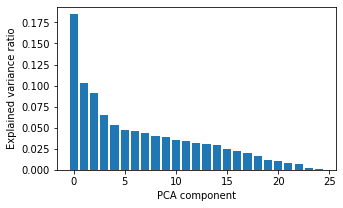

In [12]:
plt.figure(figsize = (5, 3))

plt.bar(range(len(hcc_pca.explained_variance_ratio_)), hcc_pca.explained_variance_ratio_)
plt.xlabel('PCA component')
plt.ylabel('Explained variance ratio')

plt.show()

### First component

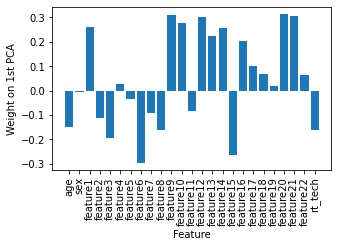

In [13]:
plt.figure(figsize = (5, 3))

plt.bar(range(hcc_pca.components_.shape[1]), hcc_pca.components_[0, :])
plt.xlabel('Feature')
plt.ylabel('Weight on 1st PCA')

plt.xticks(range(hcc_pca.components_.shape[1]), labels = hcc_input_imputed_std.columns.values, rotation = 90)

plt.show()

## Embed the original data onto new dimensions
First, we need to transform the data into new dimensions via **PCA.transform(data)**

In [14]:
hcc_pca_embedded = hcc_pca.transform(hcc_input_imputed_std)
print('shape of original data:', hcc_input_imputed_std.shape)
print('shape of transformed data:', hcc_pca_embedded.shape)

shape of original data: (232, 25)
shape of transformed data: (232, 25)


### PCA does not reduce dimensions! Only sort them based on data variance

## Visualize the embedded data using the first two PCA components
Note that dimensions are the columns

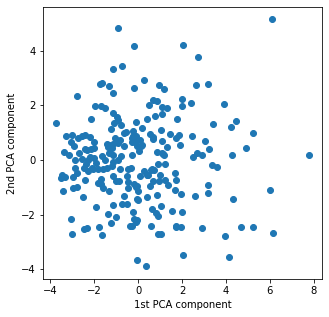

In [15]:
plt.figure(figsize = (5, 5))

plt.scatter(hcc_pca_embedded[:, 0], hcc_pca_embedded[:, 1])
plt.xlabel('1st PCA component')
plt.ylabel('2nd PCA component')

plt.show()

### Add outcome information to the plot
Outcome data is in the **outcome** column of **hcc_data**

We can provide data through the **c** argument in **plt.scatter()** to control the coloring

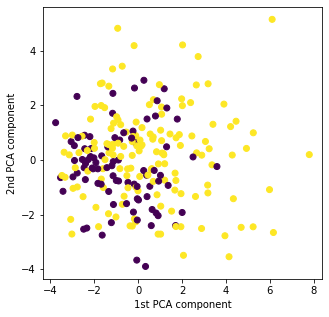

In [16]:
plt.figure(figsize = (5, 5))

plt.scatter(hcc_pca_embedded[:, 0], hcc_pca_embedded[:, 1], c = hcc_data['outcome'])
plt.xlabel('1st PCA component')
plt.ylabel('2nd PCA component')

plt.show()

### A more elegant way is to control the colors manually
By plotting data points from each class separately, we can control both color and legend

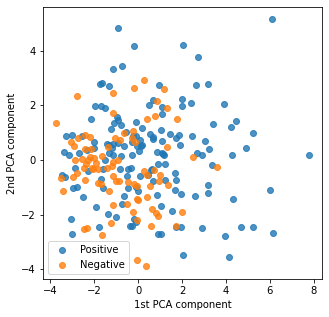

In [17]:
plt.figure(figsize = (5, 5))

positive = hcc_data['outcome'] == 1
plt.scatter(hcc_pca_embedded[positive, 0], hcc_pca_embedded[positive, 1], c = 'tab:blue', alpha = 0.8, label = 'Positive')

negative = hcc_data['outcome'] == 0
plt.scatter(hcc_pca_embedded[negative, 0], hcc_pca_embedded[negative, 1], c = 'tab:orange', alpha = 0.8, label = 'Negative')

plt.xlabel('1st PCA component')
plt.ylabel('2nd PCA component')
plt.legend()

plt.show()

### Now, let's add rt_tech (the technique used) to the plot instead
This is in the **rt_tech** column of **hcc_data**. There are 3 possible values: 1, 2, 3

When there are many possible values, we can use **for loop** to assist the plot 

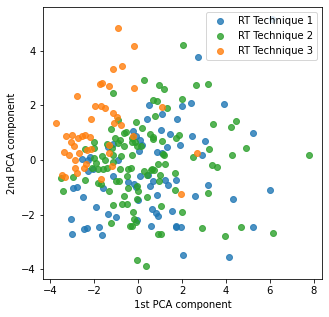

In [18]:
plt.figure(figsize = (5, 5))

colors = ['tab:blue', 'tab:green', 'tab:orange']

for n in [1, 2, 3]:
    selected = hcc_data['rt_tech'] == n
    plt.scatter(hcc_pca_embedded[selected, 0], hcc_pca_embedded[selected, 1], c = colors[n - 1], \
                alpha = 0.8, label = 'RT Technique ' + str(n))

plt.xlabel('1st PCA component')
plt.ylabel('2nd PCA component')
plt.legend()

plt.show()

## Task 1: How should we add patient age information into the visualization?

## Task 2: What if we want to highlight patients age >60 and <60?

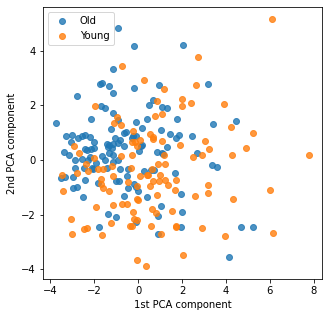

In [19]:
plt.figure(figsize = (5, 5))

positive = hcc_data['age'] > 60
plt.scatter(hcc_pca_embedded[positive, 0], hcc_pca_embedded[positive, 1], c = 'tab:blue', alpha = 0.8, label = 'Old')

negative = hcc_data['age'] <= 60
plt.scatter(hcc_pca_embedded[negative, 0], hcc_pca_embedded[negative, 1], c = 'tab:orange', alpha = 0.8, label = 'Young')

plt.xlabel('1st PCA component')
plt.ylabel('2nd PCA component')
plt.legend()

plt.show()

## Next, let's use t-SNE
The key parameters are **n_components** and **perplexity**. We will use the default value for now

I also recommend making a habit of adding **metric** and **random_state** arguments even when using the default

Note that with **TSNE**, there is no **transform()**, only **fit_transform()**

In [20]:
hcc_tsne_embedded_default = TSNE(n_components = 2, perplexity = 30, metric = 'euclidean', \
                                 random_state = 4649).fit_transform(hcc_input_imputed_std)

C:\Users\Sira\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Sira\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


### Because we will be visualizing many results from t-SNE, let's define a function here

In [21]:
def view_embedded_with_outcome(embedded_data, label, title):
    positive = label == 1
    plt.scatter(embedded_data[positive, 0], embedded_data[positive, 1], c = 'tab:blue', alpha = 0.8, label = 'Positive')

    negative = label == 0
    plt.scatter(embedded_data[negative, 0], embedded_data[negative, 1], c = 'tab:orange', alpha = 0.8, label = 'Negative')

    plt.xlabel('1st t-SNE dimension')
    plt.ylabel('2nd t-SNE dimension')
    plt.legend()
    plt.title(title)

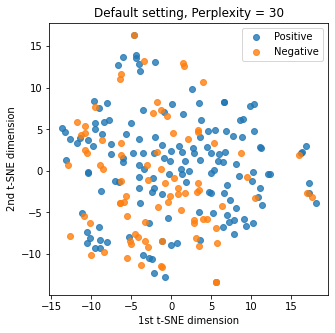

In [22]:
plt.figure(figsize = (5, 5))
view_embedded_with_outcome(hcc_tsne_embedded_default, hcc_data['outcome'], 'Default setting, Perplexity = 30')

## Let's vary the perplexity and observe what happens

C:\Users\Sira\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Sira\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\Sira\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Sira\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\Sira\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Sira\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarnin

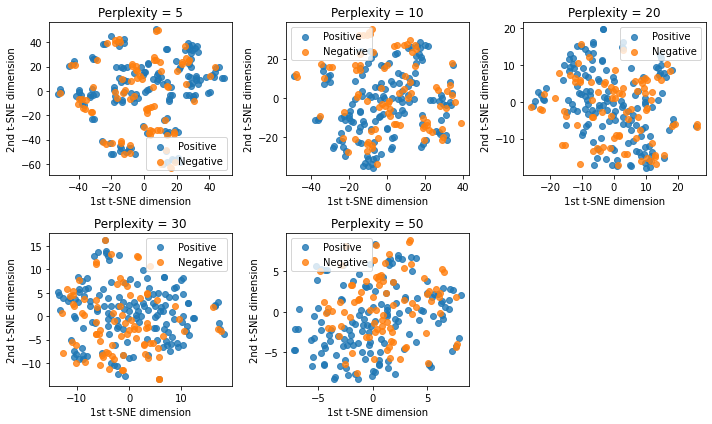

In [23]:
perplexities = [5, 10, 20, 30, 50]

plt.figure(figsize = (10, 6))

for i in range(len(perplexities)):
    plt.subplot(2, 3, i + 1)
    tsne_embedded = TSNE(n_components = 2, perplexity = perplexities[i], metric = 'euclidean', \
                         random_state = 4649).fit_transform(hcc_input_imputed_std)
    view_embedded_with_outcome(tsne_embedded, hcc_data['outcome'], 'Perplexity = ' + str(perplexities[i]))
    
plt.tight_layout()
plt.show()

## We can also embed into 3D

In [24]:
hcc_tsne_embedded_3d = TSNE(n_components = 3, perplexity = 50, metric = 'euclidean', \
                            random_state = 4649).fit_transform(hcc_input_imputed_std)

C:\Users\Sira\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Sira\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


### 3D visualization with matplotlib require some changes
**ax = plt.axes(projection = '3d')** creates a 3D handler

Use ax.set_#label() instead of plt.#label()

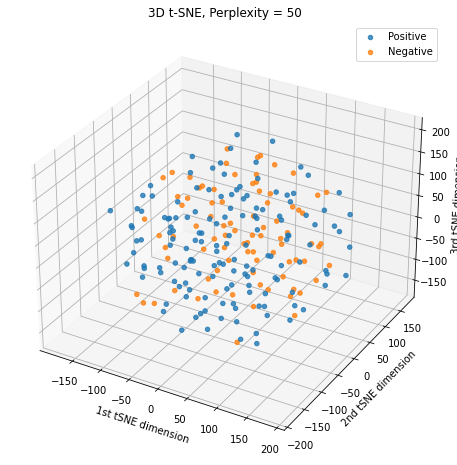

In [25]:
plt.figure(figsize = (8, 8))
ax = plt.axes(projection = '3d')

positive = hcc_data['outcome'] == 1
ax.scatter(hcc_tsne_embedded_3d[positive, 0], hcc_tsne_embedded_3d[positive, 1], hcc_tsne_embedded_3d[positive, 2], c = 'tab:blue', alpha = 0.8, label = 'Positive')

negative = hcc_data['outcome'] == 0
ax.scatter(hcc_tsne_embedded_3d[negative, 0], hcc_tsne_embedded_3d[negative, 1], hcc_tsne_embedded_3d[negative, 2], c = 'tab:orange', alpha = 0.8, label = 'Negative')

ax.set_xlabel('1st tSNE dimension')
ax.set_ylabel('2nd tSNE dimension')
ax.set_zlabel('3rd tSNE dimension')
plt.legend()
plt.title('3D t-SNE, Perplexity = 50')

plt.show()

## Load Wisconsin breast cancer from scikit-learn

In [26]:
wis_data_raw = load_breast_cancer()
wis_label = wis_data_raw['target']
wis_input = pd.DataFrame(wis_data_raw['data'], columns = wis_data_raw['feature_names'])

wis_input.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


## Standardize data

In [27]:
wis_input_std = (wis_input - wis_input.mean(axis = 0)) / wis_input.std(axis = 0)

## Perform PCA and visualize

In [28]:
wis_pca = PCA(n_components = wis_input_std.shape[1]).fit(wis_input_std)
wis_pca_embedded = wis_pca.transform(wis_input_std)

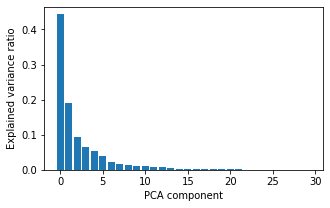

In [29]:
plt.figure(figsize = (5, 3))

plt.bar(range(len(wis_pca.explained_variance_ratio_)), wis_pca.explained_variance_ratio_)
plt.xlabel('PCA component')
plt.ylabel('Explained variance ratio')

plt.show()

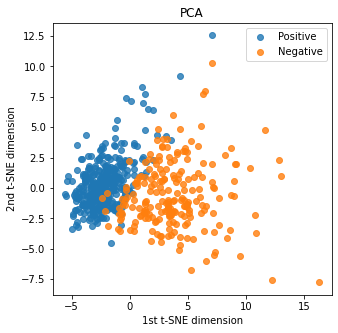

In [30]:
plt.figure(figsize = (5, 5))
view_embedded_with_outcome(wis_pca_embedded, wis_label, 'PCA')

## Perform t-SNE at various perplexities and visualize

C:\Users\Sira\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Sira\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\Sira\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Sira\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\Sira\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Sira\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarnin

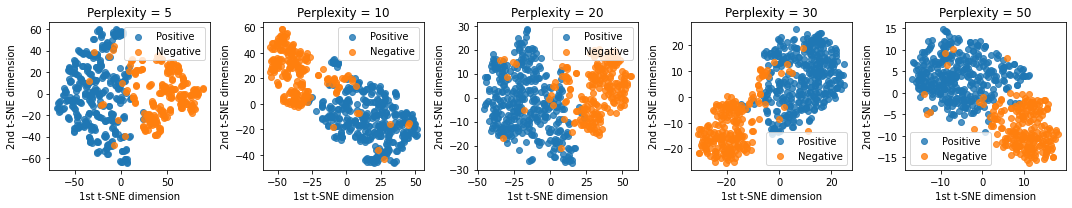

In [31]:
perplexities = [5, 10, 20, 30, 50]

plt.figure(figsize = (15, 3))

for i in range(len(perplexities)):
    plt.subplot(1, 5, i + 1)
    tsne_embedded = TSNE(n_components = 2, perplexity = perplexities[i], metric = 'euclidean', \
                         random_state = None).fit_transform(wis_input_std)
    view_embedded_with_outcome(tsne_embedded, wis_label, 'Perplexity = ' + str(perplexities[i]))
    
plt.tight_layout()
plt.show()

## Let's take a closer look at perplexity = 50
Note that the **random_state** is set. This will ensure that the t-SNE result will look the same every time

C:\Users\Sira\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Sira\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


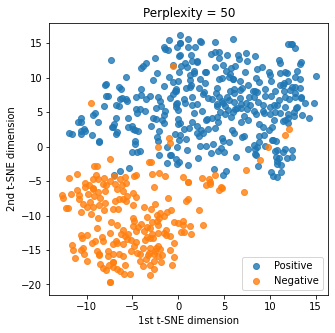

In [32]:
wis_tsne_embedded = TSNE(n_components = 2, perplexity = 50, metric = 'euclidean', \
                         random_state = 4649).fit_transform(wis_input_std)

plt.figure(figsize = (5, 5))
view_embedded_with_outcome(wis_tsne_embedded, wis_label, 'Perplexity = 50')

### The negative group seems to contain two subgroups
Let's compare the feature values between these two subgroups

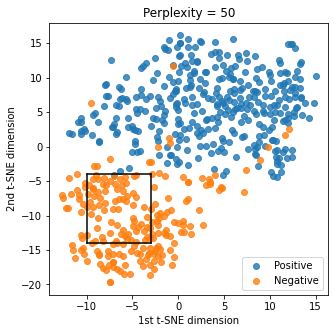

In [33]:
plt.figure(figsize = (5, 5))
view_embedded_with_outcome(wis_tsne_embedded, wis_label, 'Perplexity = 50')

plt.plot([-10, -3], [-14, -14], c = 'k')
plt.plot([-10, -3], [-4, -4], c = 'k')
plt.plot([-10, -10], [-4, -14], c = 'k')
plt.plot([-3, -3], [-4, -14], c = 'k')

In [34]:
negative_g1_indices = [i for i in range(wis_tsne_embedded.shape[0]) if \
                       wis_label[i] == 0 and \
                       wis_tsne_embedded[i, 0] > -10 and \
                       wis_tsne_embedded[i, 0] < -3 and \
                       wis_tsne_embedded[i, 1] > -14 and \
                       wis_tsne_embedded[i, 1] < -4]

negative_g2_indices = [i for i in range(wis_tsne_embedded.shape[0]) if \
                       wis_label[i] == 0 and not i in negative_g1_indices]

In [35]:
negative_g1_g2_mean_ratio = wis_input.iloc[negative_g1_indices].mean(axis = 0) / wis_input.iloc[negative_g2_indices].mean(axis = 0)
print(negative_g1_g2_mean_ratio)

mean radius                0.940703
mean texture               1.019096
mean perimeter             0.943947
mean area                  0.867492
mean smoothness            1.072919
mean compactness           1.139257
mean concavity             1.086317
mean concave points        1.044127
mean symmetry              1.043112
mean fractal dimension     1.054729
radius error               0.702515
texture error              0.796062
perimeter error            0.685076
area error                 0.631856
smoothness error           0.886594
compactness error          0.967052
concavity error            0.883852
concave points error       0.854199
symmetry error             0.798395
fractal dimension error    0.961711
worst radius               0.968547
worst texture              1.056158
worst perimeter            0.966701
worst area                 0.920611
worst smoothness           1.141988
worst compactness          1.358080
worst concavity            1.265131
worst concave points       1

## Finally, we can also use PCA embedding as input to t-SNE
Here, we keep only the first 5 dimensions of PCA

C:\Users\Sira\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Sira\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\Sira\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Sira\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\Sira\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Sira\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarnin

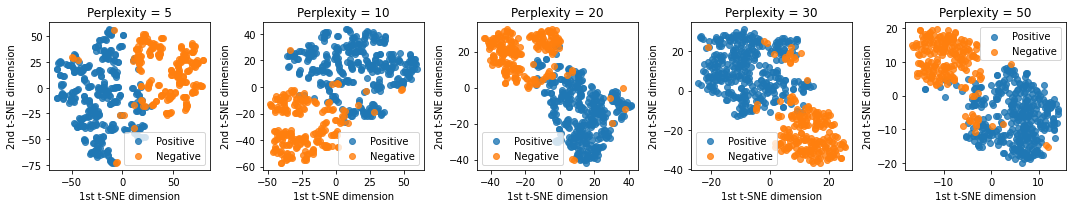

In [36]:
perplexities = [5, 10, 20, 30, 50]

plt.figure(figsize = (15, 3))

for i in range(len(perplexities)):
    plt.subplot(1, 5, i + 1)
    tsne_embedded = TSNE(n_components = 2, perplexity = perplexities[i], metric = 'euclidean', \
                         random_state = None).fit_transform(wis_pca_embedded[:, :5])
    view_embedded_with_outcome(tsne_embedded, wis_label, 'Perplexity = ' + str(perplexities[i]))
    
plt.tight_layout()
plt.show()